In [7]:
# autoreload
%load_ext autoreload
%autoreload 2

import os

while ".gitignore" not in os.listdir():
    parent = os.path.dirname(os.getcwd())
    os.chdir(parent)
print(f"Working directory: {os.getcwd()}")


import scanpy as sc
import torch

import matplotlib.pyplot as plt
import wandb

from spatialnca.data import prepare_data
from spatialnca.model import SpatialNCA
from spatialnca.train import Trainer, train

from spatialnca.utils import (
    seed_everything,
    spatial_scatter,
    plot_pyg,
    construct_graph,
)
from spatialnca.config import Config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Working directory: /home/dschaub/projects/spatialnca


In [8]:
default_cfg = Config()
cfg = Config()
# cfg.emb_key = None
# cfg.add_init = True
# cfg.act = "gelu"
# cfg.gpt2_weight_init = True
# cfg.pos_init_fn = "uniform"
# cfg.pos_init_fn = "sunflower"
# cfg.knn = 20
# cfg.fixed_edge_index = False
# cfg.n_epochs = int(1e6)
cfg.n_epochs = 100
# cfg.intm_loss = True
# cfg.normalize_diff = True
cfg.max_coord_upd_norm = 0.1
# cfg.complete = True
# cfg.delaunay = True
# cfg.knn = None
# cfg.pos_init_fn = "random_walk"
# cfg.pos_init_kwargs = {"scale": 0.1}
cfg.n_steps = 50
# cfg.kernel_fn = "gaussian"
# cfg.kernel_kwargs = {"sigma": 0.0}
# cfg.use_attn = True

diff = cfg - default_cfg
if len(diff) > 0:
    diff_str = ",\n".join([f"{k}={v}" for k, v in diff.items()])
else:
    diff_str = "Default config"
clean_diff_str = diff_str.replace(", ", "_").replace("\n", "_")
print(diff_str)

n_epochs=10000->100,
n_steps=5->50,
max_coord_upd_norm=None->0.1


Constructed graph with 318 nodes and 3180 edges


Training:   0%|          | 0/100 [00:00<?, ?it/s]

epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇██
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,99
train_loss,0.00414


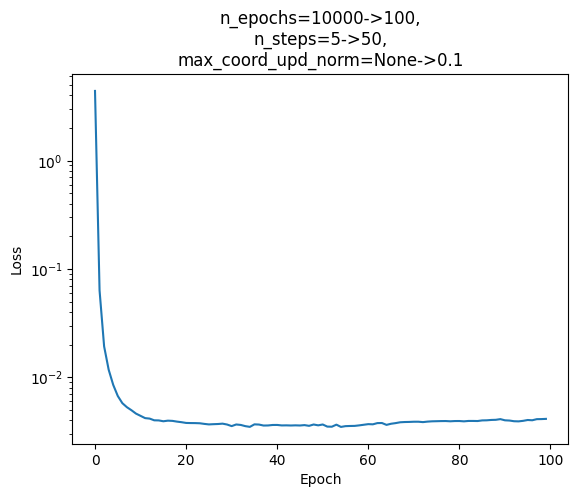

In [9]:
trainer = train(cfg, print_cfg=False)
trainer.plot_history(title=diff_str, save_path=f"figures/history_{clean_diff_str}.png")

torch.save(trainer.model, f"checkpoints/trained_model_{clean_diff_str}.pt")